In [1]:
from collections import Counter
from operator import mul
from functools import reduce
import re

space_x, space_y = 101, 103

def get_coords(input: str):
    pattern = re.compile(r"p=(\d+),(\d+) v=(-?\d+),(-?\d+)")
    return [tuple(map(int, pattern.match(line).groups())) for line in input.split("\n")]

def move_one(x, y, dx, dy, secs):
    x_ = (x + dx * secs) % space_x
    y_ = (y + dy * secs) % space_y
    return x_, y_ 

def move_all(coords, secs):
    output = list()
    for row in coords:
        output.append(move_one(*row, secs))
    return output

def get_quadrants(output):
    quadrants  = list()
    for c in output:
        if c[0] == (space_x - 1)/2 or c[1] == (space_y - 1)/2:
            continue
        quadrants.append(
            (c[0] > (space_x // 2), c[1] > (space_y // 2))   
        )
    return quadrants

def part1(input):
    coords = get_coords(input)
    output = move_all(coords, 100)
    quadrants = get_quadrants(output)

    print(reduce(mul, Counter(quadrants).values()))


In [2]:
input = open('inputs/14.txt').read()
part1(input)


225521010


In [3]:
import matplotlib.pyplot as plt

def display(coords):
    space = [["." for _ in range(space_x)] for _ in range(space_y)]
    for c in coords:
        space[c[1]][c[0]] = "#"
    
    # Convert the space to a numerical array for imshow
    space_numeric = [[1 if cell == "#" else 0 for cell in row] for row in space]
    
    plt.imshow(space_numeric, cmap='Greys', interpolation='none')
    plt.show()

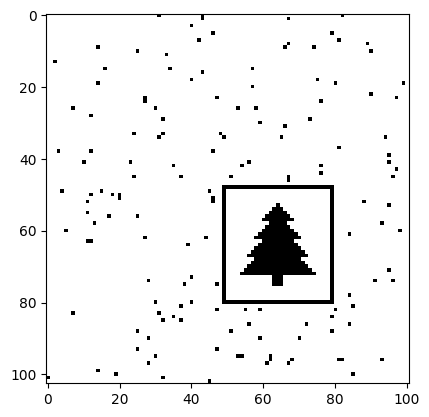

KeyboardInterrupt: 

In [5]:
import time
from IPython.display import clear_output

coords = get_coords(input)
n=72
while True:
    display(move_all(coords,401 + 101*n))
    time.sleep(2)
    n+=1
    clear_output()

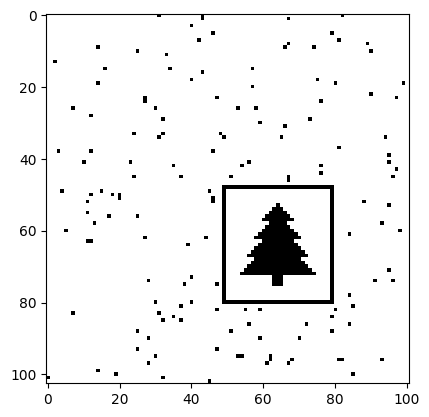

7774

In [ ]:
display(move_all(coords,401 + 101*73))
401 + 101*73